In [343]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
import math

In [344]:
font1 = {'family': 'Times New Roman',
             'weight': 'normal',
             'size': 15,
             }

df = pd.read_csv("../output/COVID_final.csv")

df = df[['id', 'location','rh_mean', 'rh_max', 'rh_min', 't2m_mean', 't2m_max', 't2m_min',
         'confirmed',
         'moveIn_index_mean', 'moveIn_index_max', 'moveIn_index_min',
         'moveOut_index_mean', 'moveOut_index_max', 'moveOut_index_min',
         'travel_index_mean', 'travel_index_max', 'travel_index_min',
         '420100_moveIn_mean', '420100_moveIn_max', '420100_moveIn_min', 'npp']]
df = df[~df['id'].isin(['371200', '710000'])] # 去除台湾和莱芜
df

,id,location,rh_mean,rh_max,rh_min,t2m_mean,t2m_max,t2m_min,confirmed,moveIn_index_mean,...,moveOut_index_mean,moveOut_index_max,moveOut_index_min,travel_index_mean,travel_index_max,travel_index_min,420100_moveIn_mean,420100_moveIn_max,420100_moveIn_min,npp
0,110000,北京市,46.496017,86.722396,17.081542,272.843342,284.989625,263.053292,580,4.460553,...,4.917454,23.914472,0.807311,3.281025,6.6375,1.3431,1.017742,2.21,0.07,6.25382
1,120000,天津市,46.401306,90.386729,10.992484,275.913800,288.570042,267.294000,174,1.958265,...,2.114363,7.012818,0.359802,3.656037,6.3527,1.4763,0.166129,0.32,0.00,7.12393
2,130100,石家庄市,52.495530,87.981583,19.951804,275.560786,288.740958,265.390500,29,1.461466,...,1.519247,4.087292,0.394826,3.702944,5.9427,1.7145,0.160645,0.29,0.00,2.14262
3,130200,唐山市,46.904882,93.551529,12.276571,274.775391,286.564375,265.588208,58,0.861429,...,0.857297,2.205662,0.200718,4.048301,5.9061,1.8941,0.001613,0.03,0.00,2.67739
4,130300,秦皇岛市,48.332962,89.614417,15.154958,273.486078,284.933333,262.464167,10,0.378024,...,0.397579,1.156615,0.081842,3.896601,5.7787,1.8130,0.000000,0.00,0.00,1.50255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,659002,阿拉尔市,48.158342,81.086542,19.870617,274.216063,288.034917,264.994958,0,0.040298,...,0.047811,0.177455,0.003110,2.532244,4.2042,0.5867,0.000000,0.00,0.00,0.66720
359,659003,图木舒克市,44.392681,81.028112,14.149744,276.443782,289.047417,267.745125,0,0.019915,...,0.023281,0.057251,0.001912,3.233440,4.9976,0.9690,0.000000,0.00,0.00,1.20936
360,659004,五家渠市,78.584650,102.987604,14.990040,265.573318,287.872083,250.613167,2,0.089543,...,0.084016,0.184032,0.015941,1.946355,3.3415,0.5857,0.000000,0.00,0.00,3.26684
361,659005,北屯市,76.934240,102.124792,30.104621,264.159054,280.935292,249.574333,0,0.040608,...,0.039931,0.138024,0.006383,2.805449,4.8881,0.4165,0.000000,0.00,0.00,1.92770


In [345]:
# feature importance 特征重要性
def feture_importance(features, indices, importances):
    print("%%%%%% feature importances %%%%%%")
    plt.barh(range(len(indices)), importances[indices], color='b', align='center', alpha=0.5)
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('feature Importance')
    plt.show()
    
# 评价指标
def evaluation(real_y, prediction_y):

    # rmse  mae r2
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(real_y, prediction_y)
    print("R-squared", r_value**2)
    print("R", r_value)

    mae = mean_absolute_error(real_y, prediction_y)
    print("mae", mae)

    rmse = mean_squared_error(real_y, prediction_y) ** 0.5
    print("rmse", rmse)


    figsize = 20,16
    figure, ax = plt.subplots(figsize=figsize)
    
    plt.subplot(1,2,1)

    plt.scatter(real_y, prediction_y, c='b', marker='o', label='', s=10, alpha=0.7, zorder=20)
    plt.plot([0, 50000], [0, 50000], '--', color='black', label='', linewidth=1.0)
    plt.tick_params(labelsize=15)

    plt.ylabel('prediction', font1)
    plt.xlabel('real', font1)
    ax = plt.gca()
    ax.set_aspect(1)
    
    plt.subplot(1,2,2)

    plt.scatter(real_y, prediction_y, c='b', marker='o', label='', s=10, alpha=0.7, zorder=20)
    plt.plot([0, 50000], [0, 50000], '--', color='black', label='', linewidth=1.0)
    plt.xlim(0, 5500)
    plt.ylim(0, 5500)
    plt.tick_params(labelsize=15)

    plt.ylabel('prediction', font1)
    plt.xlabel('real', font1)
    ax = plt.gca()
    ax.set_aspect(1)
    
    plt.show()

In [346]:
def covid_all_predict(df):

    real_y = []
    prediction_y = []

    kf = KFold(3, True)
    index = []
    for train_index, test_index in kf.split(df):
        index.append((train_index, test_index))

    clf = [RandomForestRegressor(n_estimators=10, min_samples_split=5, max_depth=5),
           RandomForestRegressor(n_estimators=10, min_samples_split=5, max_depth=5),
           RandomForestRegressor(n_estimators=10, min_samples_split=5, max_depth=5)]

    for i in range(len(index)):

        train_df = df.iloc[index[i][0], :]
        test_df = df.iloc[index[i][1], :]

        train_y = train_df['confirmed']
        #train_y = train_df['confirmed_before']
        #train_y = train_df['confirmed_after']

        #train_y = train_df['dead']
        train_x = train_df.drop(['id', 'location', 'confirmed'], axis=1)
        #train_x = train_df.drop(['id', 'location', 'confirmed_before', 'cured_before', 'dead_before'], axis=1)
        #train_x = train_df.drop(['id', 'location', 'confirmed_after', 'cured_after', 'dead_after'], axis=1)


        test_y = test_df['confirmed']
        #test_y = test_df['confirmed_before']
        #test_y = test_df['confirmed_after']
        #test_y = test_df['dead']
        test_x = test_df.drop(['id', 'location', 'confirmed'], axis=1)
        #test_x = test_df.drop(['id', 'location', 'confirmed_before', 'cured_before', 'dead_before'], axis=1)
        #test_x = test_df.drop(['id', 'location', 'confirmed_after', 'cured_after', 'dead_after'], axis=1)


        clf[i].fit(train_x, train_y)
        predict_y = clf[i].predict(test_x)

        real_y.extend(test_y)
        prediction_y.extend(predict_y)

        print("train fold " + str(i+1))
        predict_train_y = clf[i].predict(train_x)
        print("预测误差较大城市:")
        train_yy = train_y.to_list()
        for j in range(len(train_df)):
            if abs(train_yy[j]-predict_train_y[j])>800:
                print(train_df.iloc[j, 1] + "   real: " + str(train_yy[j]) + "   pre:" + str(predict_train_y[j]))
        evaluation(train_y, predict_train_y)
                
        print("#########################################")

        print("test fold " + str(i+1))
        print("预测误差较大城市:")
        test_yy = test_y.to_list()
        for j in range(len(test_df)):
            if abs(test_yy[j]-predict_y[j])>800:
                print(test_df.iloc[j, 1] + "   real: " + str(test_yy[j]) + "   pre:" + str(predict_y[j]))
        evaluation(test_y, predict_y)
        
        print("                             ")
        


    print("************* cv evaluation ***************")
    evaluation(real_y, prediction_y)

    # feature importance
    train_y = df['confirmed']
    #train_y = df['confirmed_before']
    #train_y = df['confirmed_after']
    # train_y = train_df['dead']
    train_x = df.drop(['id', 'location', 'confirmed'], axis=1)
    #train_x = df.drop(['id', 'location', 'confirmed_before', 'cured_before', 'dead_before'], axis=1)
    #train_x = df.drop(['id', 'location', 'confirmed_after', 'cured_after', 'dead_after'], axis=1)


    clf = RandomForestRegressor(n_estimators=10, min_samples_split=5, max_depth=5)
    clf.fit(train_x, train_y)
    print("%%%%%%%%%%%%% all sample model %%%%%%%%%%%%%%")
    evaluation(train_y, clf.predict(train_x))
    features = list(train_x)
    importances = clf.feature_importances_
    indices = np.argsort(importances)
    feture_importance(features, indices, importances)


In [347]:
# 随机森林建模疫情——全国城市，确诊人数不做log处理
# 高值城市预测较差，比如湖北那些城市，但是也会出现一些确诊人数为0-5城市预测达到几千甚至几万

train fold 1
预测误差较大城市:
武汉市   real: 50006   pre:30529.403333333332
香港特别行政区   real: 714   pre:5466.878297055058
R-squared 0.9725910661786699
R 0.9862003174703757
mae 121.37446048155124
rmse 1292.092701920465


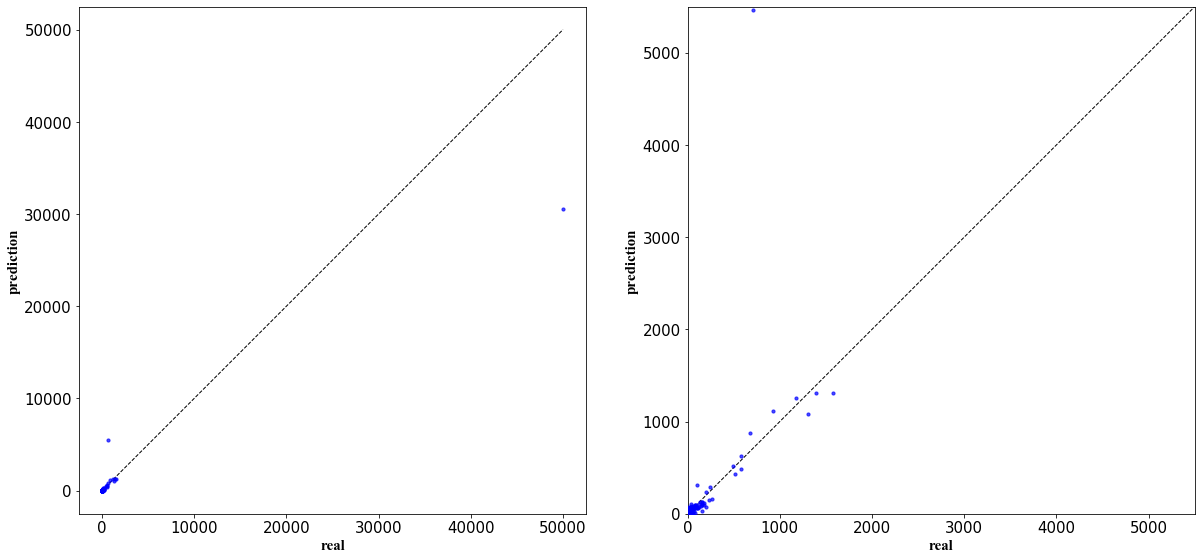

#########################################
test fold 1
预测误差较大城市:
孝感市   real: 3518   pre:1313.0707142857143
黄冈市   real: 2907   pre:1313.0707142857143
恩施土家族苗族自治州   real: 252   pre:1081.4818253968256
R-squared 0.6551165388602642
R 0.8093926975580298
mae 68.721752955479
rmse 270.4174193046056


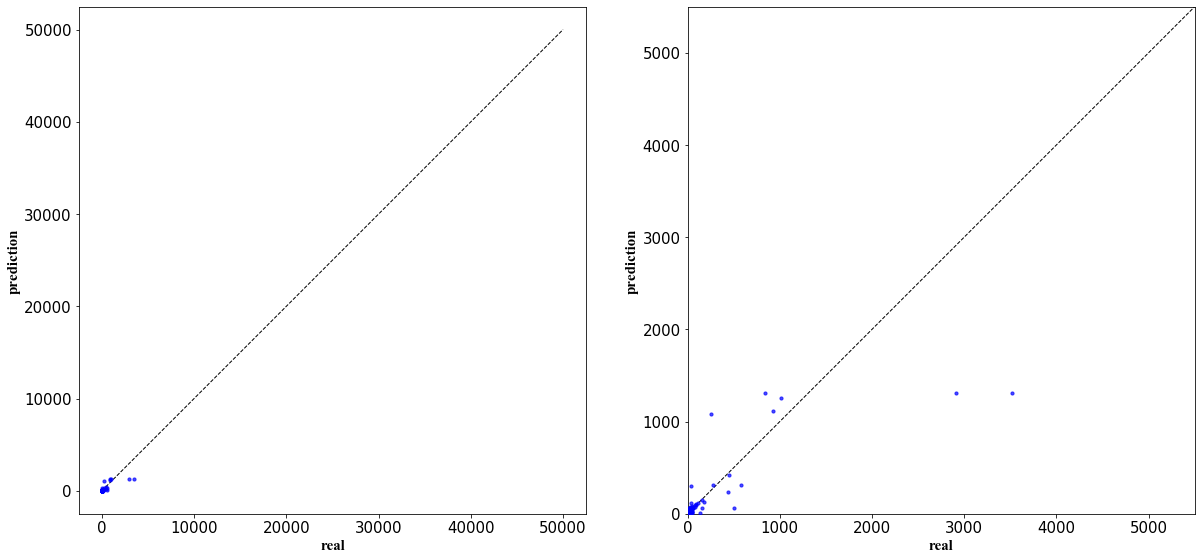

                             
train fold 2
预测误差较大城市:
武汉市   real: 50006   pre:26548.15
孝感市   real: 3518   pre:2715.846666666667
香港特别行政区   real: 714   pre:5573.284536082474
R-squared 0.9590361220524879
R 0.9793038966799263
mae 142.1647083878953
rmse 1544.680861306095


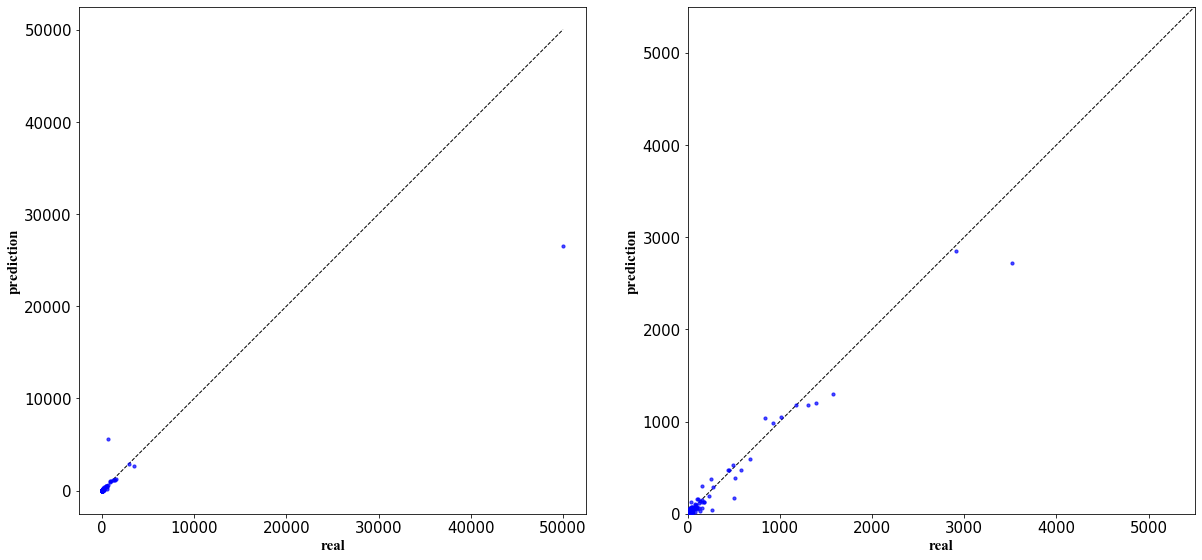

#########################################
test fold 2
预测误差较大城市:
阿里地区   real: 0   pre:5434.486244822665
五家渠市   real: 2   pre:5153.781855671978
R-squared 0.023205802459238308
R 0.15233450843206311
mae 114.40447539560124
rmse 684.257564127354


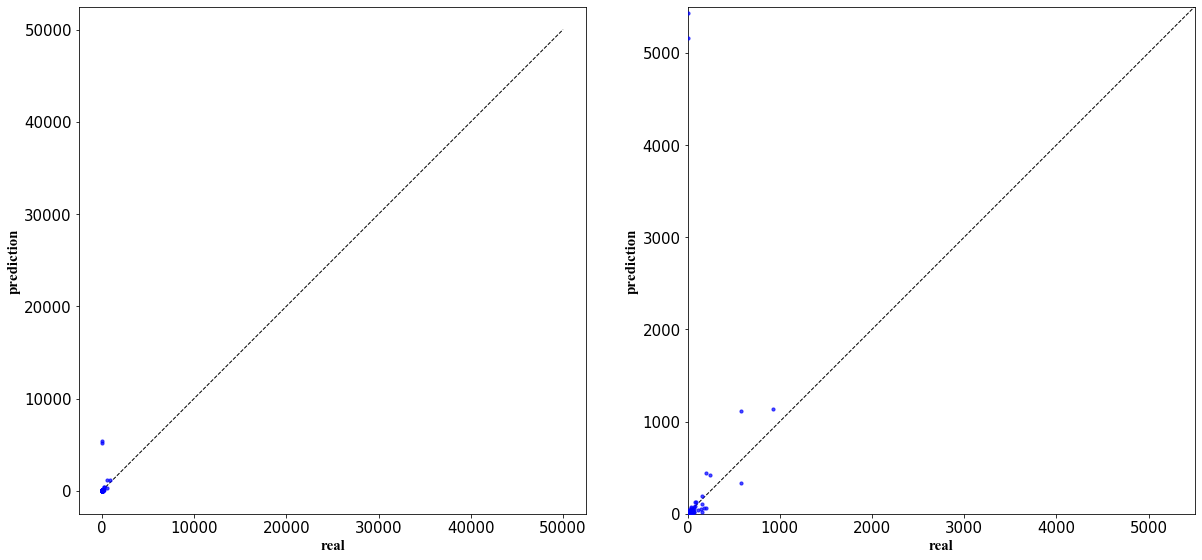

                             
train fold 3
预测误差较大城市:
R-squared 0.985088583674385
R 0.9925162888710618
mae 18.10359617519453
rmse 46.13814119473974


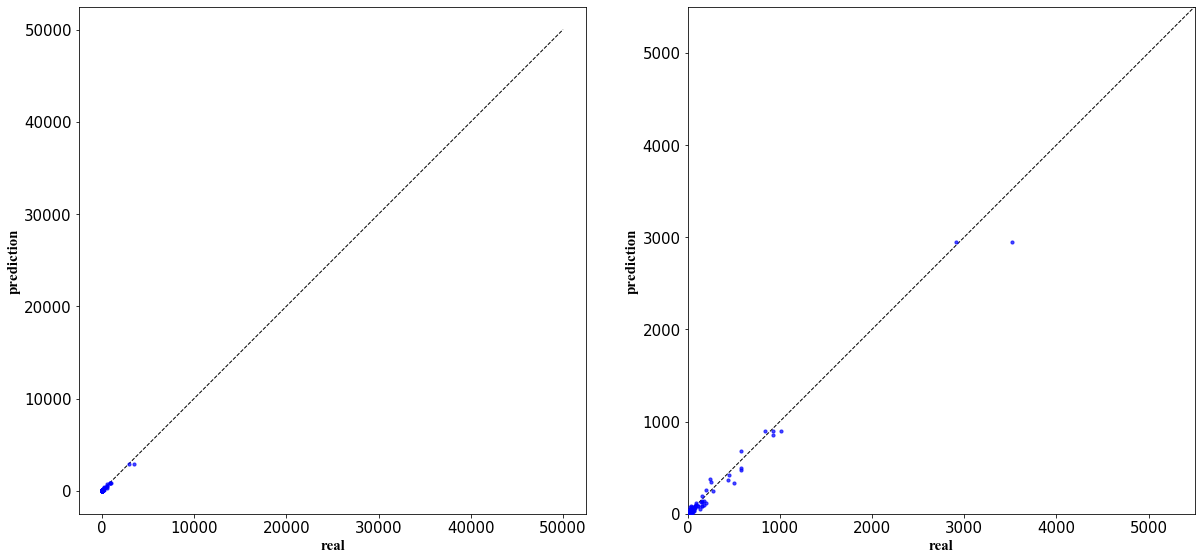

#########################################
test fold 3
预测误差较大城市:
武汉市   real: 50006   pre:2945.3277777777776
R-squared 0.751526259084552
R 0.8669061420272393
mae 438.59412024445743
rmse 4297.810050530219


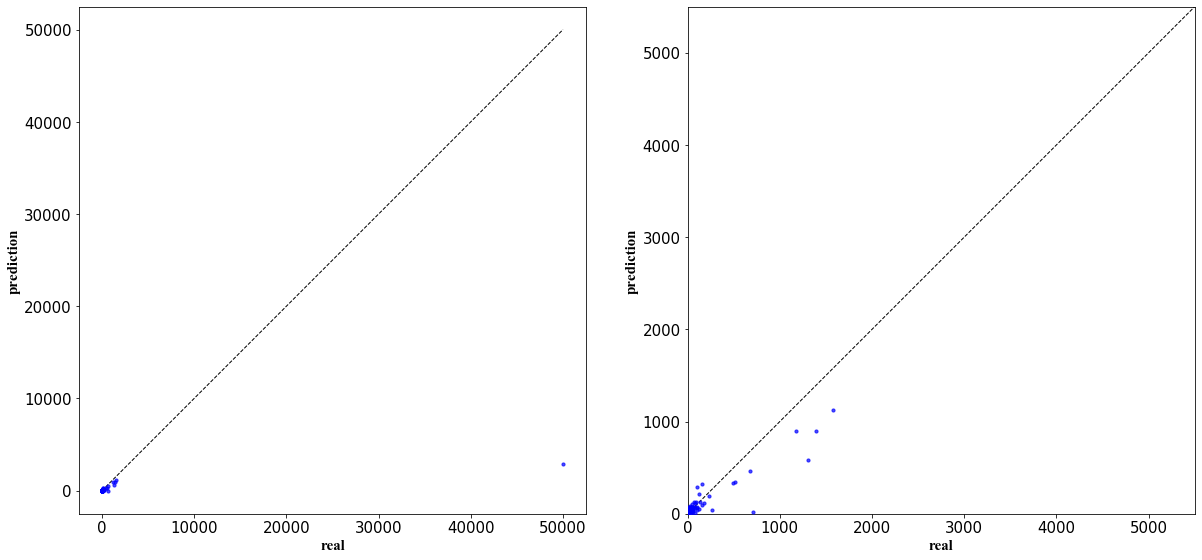

                             
************* cv evaluation ***************
R-squared 0.12984636070438926
R 0.3603420051900545
mae 206.60101673982211
rmse 2510.773450098694


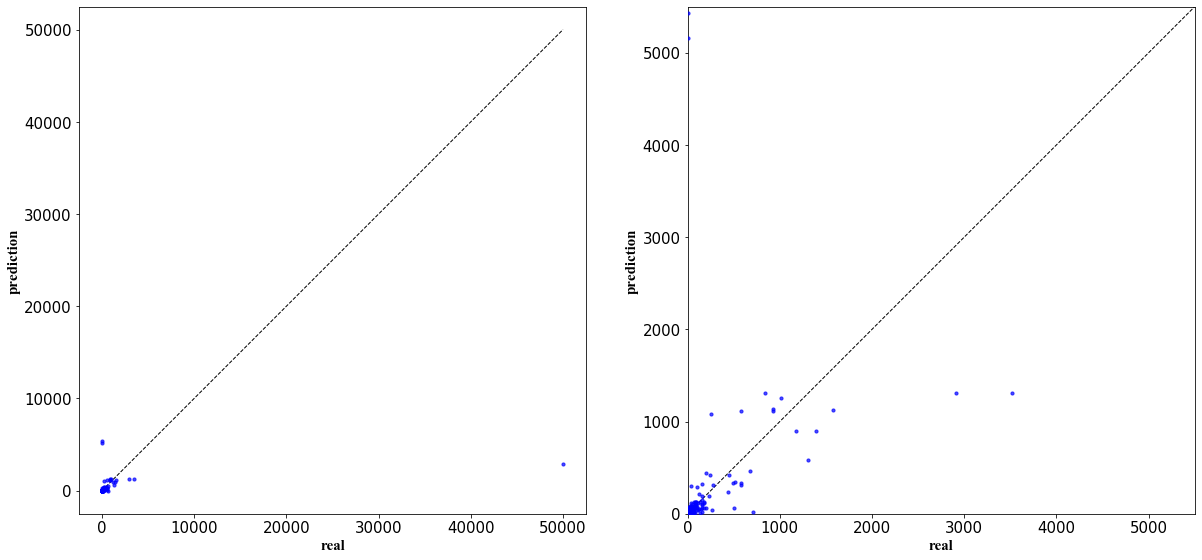

%%%%%%%%%%%%% all sample model %%%%%%%%%%%%%%
R-squared 0.9962772211313601
R 0.9981368749482007
mae 78.09173553588502
rmse 989.1277002881263


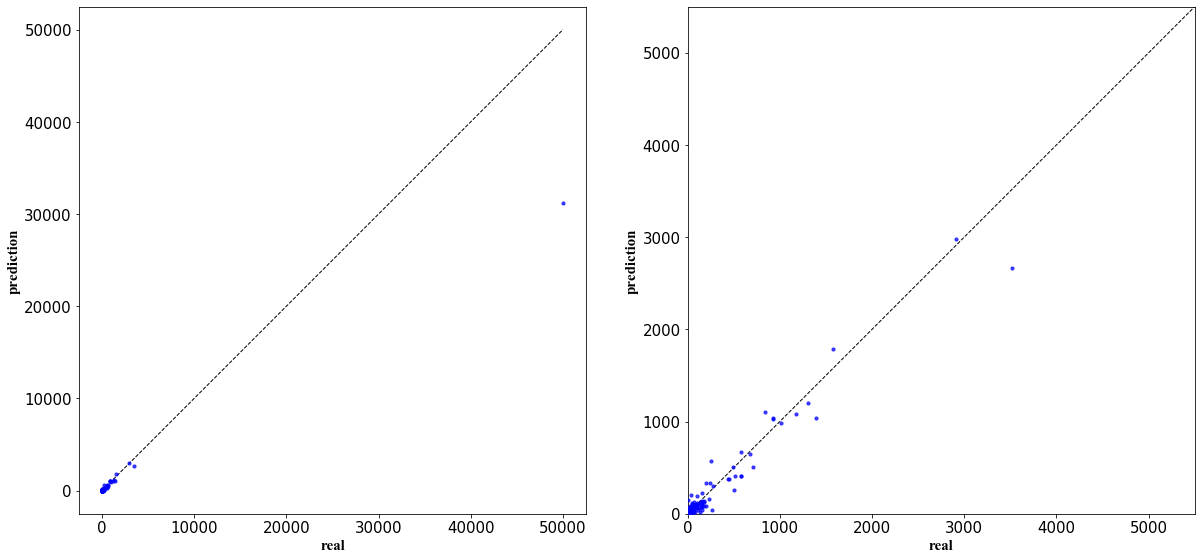

%%%%%% feature importances %%%%%%


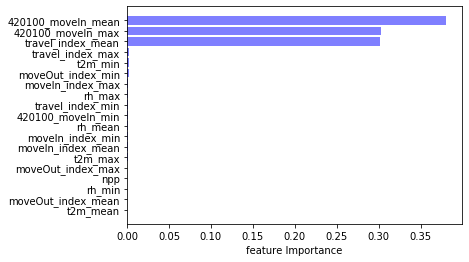

In [348]:
df1 = df[['id', 'location','rh_mean', 'rh_max', 'rh_min', 't2m_mean', 't2m_max', 't2m_min',
         'confirmed',
         'moveIn_index_mean', 'moveIn_index_max', 'moveIn_index_min',
         'moveOut_index_mean', 'moveOut_index_max', 'moveOut_index_min',
         'travel_index_mean', 'travel_index_max', 'travel_index_min',
         '420100_moveIn_mean', '420100_moveIn_max', '420100_moveIn_min', 'npp']]
covid_all_predict(df1)

In [349]:
df[(df['location'].isin(['阿里地区', '武汉市', '黄冈市', '随州市', '孝感市', '香港特别行政区', '五家渠市']))] 

,id,location,rh_mean,rh_max,rh_min,t2m_mean,t2m_max,t2m_min,confirmed,moveIn_index_mean,...,moveOut_index_mean,moveOut_index_max,moveOut_index_min,travel_index_mean,travel_index_max,travel_index_min,420100_moveIn_mean,420100_moveIn_max,420100_moveIn_min,npp
168,420100,武汉市,71.641574,98.844104,31.390192,282.450565,294.089083,274.252792,50006,1.441894,...,2.023355,11.840321,0.212155,1.722975,5.3340,0.5687,100.000000,100.00,100.00,6.210740
175,420900,孝感市,71.220821,98.873508,29.082767,281.658520,293.299625,273.262500,3518,0.581259,...,0.472132,1.164488,0.094478,2.987432,5.9112,1.3667,13.913226,17.67,10.41,0.946868
177,421100,黄冈市,73.670450,98.016054,37.838771,281.820969,293.489792,273.849833,2907,0.785669,...,0.582993,1.637885,0.102838,3.386525,6.4569,1.6993,13.977419,22.70,10.52,0.613669
179,421300,随州市,70.869639,97.576775,30.338342,281.006504,292.876125,272.773417,1307,0.238099,...,0.192810,0.527116,0.031007,2.924918,5.8408,1.1908,2.761613,4.15,1.38,0.398786
305,542500,阿里地区,55.037603,73.536887,35.708508,257.553897,267.711208,249.037208,0,0.003815,...,0.005285,0.016816,0.001134,1.901725,2.6877,1.4309,0.000000,0.00,0.00,0.226693
360,659004,五家渠市,78.584650,102.987604,14.990040,265.573318,287.872083,250.613167,2,0.089543,...,0.084016,0.184032,0.015941,1.946355,3.3415,0.5857,0.000000,0.00,0.00,3.266840
363,810000,香港特别行政区,78.458618,98.541542,37.033225,291.946578,296.756000,283.611292,714,0.247394,...,0.203531,0.798595,0.026050,1.780012,2.8099,0.9542,0.000000,0.00,0.00,17.883100


In [350]:
df[df['confirmed']==0]

,id,location,rh_mean,rh_max,rh_min,t2m_mean,t2m_max,t2m_min,confirmed,moveIn_index_mean,...,moveOut_index_mean,moveOut_index_max,moveOut_index_min,travel_index_mean,travel_index_max,travel_index_min,420100_moveIn_mean,420100_moveIn_max,420100_moveIn_min,npp
35,152900,阿拉善盟,37.460076,77.130896,10.485974,271.454380,285.738000,260.741708,0,0.138973,...,0.127751,0.282982,0.019537,4.200933,5.7514,2.3617,0.000000,0.00,0.0,0.313230
39,210400,抚顺市,53.614253,93.166404,22.659013,268.328880,282.521375,253.800333,0,0.276351,...,0.287769,0.571050,0.081130,4.171141,5.5384,2.2454,0.000000,0.00,0.0,1.130660
55,220600,白山市,64.456539,90.877408,26.230492,264.605360,279.024083,248.041625,0,0.100141,...,0.105081,0.250776,0.021967,3.844088,5.3060,1.8043,0.000000,0.00,0.0,0.452778
137,370500,东营市,53.890602,97.186767,17.651060,277.743397,290.667625,269.730083,0,0.391314,...,0.407123,1.057439,0.068008,5.171726,6.8429,2.5932,0.000000,0.00,0.0,2.428600
219,445300,云浮市,78.229968,95.574825,47.270446,290.574102,297.849458,281.515250,0,0.478476,...,0.395164,0.607727,0.146869,3.997597,5.2076,2.7247,0.000000,0.00,0.0,0.836622
233,451400,崇左市,81.466374,97.537413,47.484579,290.304263,297.722167,282.860583,0,0.386464,...,0.387383,0.963997,0.091951,4.297804,6.0758,2.4089,0.000000,0.00,0.0,0.405438
237,469001,五指山市,79.889544,96.126750,69.150208,293.308375,298.180250,284.781417,0,0.038218,...,0.041080,0.102190,0.009234,3.407967,4.5801,2.1485,0.000000,0.00,0.0,0.262019
243,469022,屯昌县,78.056228,91.142750,62.098121,295.374832,300.870125,286.682167,0,0.076877,...,0.072852,0.132224,0.023944,4.467760,6.4619,3.1276,0.000000,0.00,0.0,0.241374
246,469025,白沙黎族自治县,77.570953,92.037604,62.859008,295.069311,299.949375,286.450875,0,0.041509,...,0.043657,0.087804,0.010400,4.591907,5.9801,3.3353,0.000000,0.00,0.0,0.236464
297,533300,怒江傈僳族自治州,81.185284,96.467996,55.143287,274.737154,282.046333,266.951583,0,0.067497,...,0.078684,0.176126,0.014515,3.099416,3.6523,1.8266,0.000000,0.00,0.0,0.141352


In [351]:
# 阿里地区、五家渠市和香港地区，与湖北等城市对比来看，香港与随州在很多特征上相似，但是武汉迁入香港的比例为0，武汉迁入随州并不为0
# 百度平台只发布前100名，所以如果不在100名内，比例应该是可以视为0的
# 确诊人数为0的城市与这些城市对比来看，香港的夜光很高，五家渠和果洛藏族自治州的特征较为相似，不过五家渠的迁徙指数会稍高一些
# 或许还是像特征分析里的那样，许多确诊人数相近的城市，特征差异较大，上面37个确诊人数为0的城市，特征差异较大，相对湿度和气温跨度较大，导致模型学不好？？？
# 另外，不仅仅是阿里地区、五家渠市和香港地区，有的时候会会变成其他一些低值城市

In [352]:
# 随机森林建模疫情——全国城市，确诊人数做log处理，label范围被压缩的小很多，精度也提高很多
# 低值城市预测的结果几乎与y轴平行，误差较大
# 或许还是像特征分析里的那样，许多确诊人数相近的城市，特征差异较大，上面37个确诊人数为0的城市，特征差异较大，相对湿度和气温跨度较大，导致模型学

In [353]:
# 评价指标
def evaluation(real_y, prediction_y):

    # rmse  mae r2
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(real_y, prediction_y)
    print("R-squared", r_value**2)
    print("R", r_value)

    mae = mean_absolute_error(real_y, prediction_y)
    print("mae", mae)

    rmse = mean_squared_error(real_y, prediction_y) ** 0.5
    print("rmse", rmse)


    figsize = 12,12
    figure, ax = plt.subplots(figsize=figsize)
    
    plt.subplot(1,2,1)

    plt.scatter(real_y, prediction_y, c='b', marker='o', label='', s=10, alpha=0.7, zorder=20)
    plt.plot([0, 12], [0, 12], '--', color='black', label='', linewidth=1.0)
    plt.xlim(0, 12)
    plt.ylim(0, 12)
    plt.tick_params(labelsize=15)

    plt.ylabel('prediction', font1)
    plt.xlabel('real', font1)
    ax = plt.gca()
    ax.set_aspect(1)
    
    plt.show()

In [354]:
def covid_all_predict(df):

    real_y = []
    prediction_y = []

    kf = KFold(3, True)
    index = []
    for train_index, test_index in kf.split(df):
        index.append((train_index, test_index))

    clf = [RandomForestRegressor(n_estimators=10, min_samples_split=5, max_depth=5),
           RandomForestRegressor(n_estimators=10, min_samples_split=5, max_depth=5),
           RandomForestRegressor(n_estimators=10, min_samples_split=5, max_depth=5)]

    for i in range(len(index)):

        train_df = df.iloc[index[i][0], :]
        test_df = df.iloc[index[i][1], :]

        train_y = train_df['confirmed']
        #train_y = train_df['confirmed_before']
        #train_y = train_df['confirmed_after']

        #train_y = train_df['dead']
        train_x = train_df.drop(['id', 'location', 'confirmed'], axis=1)
        #train_x = train_df.drop(['id', 'location', 'confirmed_before', 'cured_before', 'dead_before'], axis=1)
        #train_x = train_df.drop(['id', 'location', 'confirmed_after', 'cured_after', 'dead_after'], axis=1)


        test_y = test_df['confirmed']
        #test_y = test_df['confirmed_before']
        #test_y = test_df['confirmed_after']
        #test_y = test_df['dead']
        test_x = test_df.drop(['id', 'location', 'confirmed'], axis=1)
        #test_x = test_df.drop(['id', 'location', 'confirmed_before', 'cured_before', 'dead_before'], axis=1)
        #test_x = test_df.drop(['id', 'location', 'confirmed_after', 'cured_after', 'dead_after'], axis=1)


        clf[i].fit(train_x, train_y)
        predict_y = clf[i].predict(test_x)

        real_y.extend(test_y)
        prediction_y.extend(predict_y)

        print("train fold " + str(i+1))
        predict_train_y = clf[i].predict(train_x)
        print("预测误差较大城市:")
        train_yy = train_y.to_list()
        for j in range(len(train_df)):
            if abs(train_yy[j]-predict_train_y[j])>1.5:
                print(train_df.iloc[j, 1] + "   real: " + str(train_yy[j]) + "   pre:" + str(predict_train_y[j]))
        evaluation(train_y, predict_train_y)
                
        print("#########################################")

        print("test fold " + str(i+1))
        print("预测误差较大城市:")
        test_yy = test_y.to_list()
        for j in range(len(test_df)):
            if abs(test_yy[j]-predict_y[j])>1.5:
                print(test_df.iloc[j, 1] + "   real: " + str(test_yy[j]) + "   pre:" + str(predict_y[j]))
        evaluation(test_y, predict_y)
        
        print("                             ")
        


    print("************* cv evaluation ***************")
    evaluation(real_y, prediction_y)

    # feature importance
    train_y = df['confirmed']
    #train_y = df['confirmed_before']
    #train_y = df['confirmed_after']
    # train_y = train_df['dead']
    train_x = df.drop(['id', 'location', 'confirmed'], axis=1)
    #train_x = df.drop(['id', 'location', 'confirmed_before', 'cured_before', 'dead_before'], axis=1)
    #train_x = df.drop(['id', 'location', 'confirmed_after', 'cured_after', 'dead_after'], axis=1)


    clf = RandomForestRegressor(n_estimators=10, min_samples_split=5, max_depth=5)
    clf.fit(train_x, train_y)
    print("%%%%%%%%%%%%% all sample model %%%%%%%%%%%%%%")
    evaluation(train_y, clf.predict(train_x))
    features = list(train_x)
    importances = clf.feature_importances_
    indices = np.argsort(importances)
    feture_importance(features, indices, importances)


train fold 1
预测误差较大城市:
双鸭山市   real: 3.970291913552122   pre:2.2012920826702995
蚌埠市   real: 5.081404364984463   pre:3.2303054181528656
武汉市   real: 10.819918274611197   pre:8.79576643217622
香港特别行政区   real: 6.5722825426940075   pre:4.196779879181081
R-squared 0.9144169019054215
R 0.956251484655277
mae 0.37922248886031096
rmse 0.5274129309829019


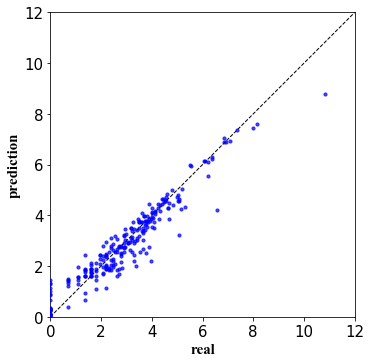

#########################################
test fold 1
预测误差较大城市:
张家口市   real: 3.7376696182833684   pre:2.162815797416541
抚顺市   real: 0.0   pre:1.969849936935682
鸡西市   real: 3.8501476017100584   pre:1.5289813115097401
七台河市   real: 2.8903717578961645   pre:0.4854959600989085
厦门市   real: 3.58351893845611   pre:5.1315484555927355
新余市   real: 4.875197323201151   pre:2.168370082021523
济宁市   real: 5.564520407322694   pre:3.4148698929378467
昌江黎族自治县   real: 2.0794415416798357   pre:0.5520809205017834
甘孜藏族自治州   real: 4.3694478524670215   pre:1.374124957818629
酒泉市   real: 0.0   pre:1.6495682623238381
海东市   real: 0.0   pre:2.2347462980460944
塔城地区   real: 0.0   pre:2.218159325523472
R-squared 0.7222361094521882
R 0.8498447560891272
mae 0.6618896751145681
rmse 0.8900584364509837


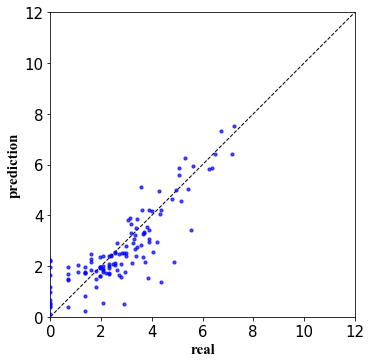

                             
train fold 2
预测误差较大城市:
云浮市   real: 0.0   pre:2.2420253178185274
崇左市   real: 0.0   pre:1.6386712034534905
塔城地区   real: 0.0   pre:1.9378634276109608
R-squared 0.8976406070640275
R 0.9474389727386284
mae 0.42176059912857383
rmse 0.5619102811776134


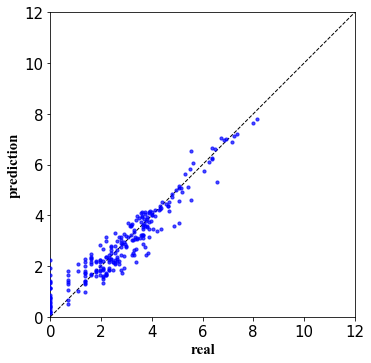

#########################################
test fold 2
预测误差较大城市:
白山市   real: 0.0   pre:1.7677872414243105
双鸭山市   real: 3.970291913552122   pre:2.1833833275994836
温州市   real: 6.22455842927536   pre:4.559804402259998
武汉市   real: 10.819918274611197   pre:7.628161667928566
拉萨市   real: 0.6931471805599453   pre:2.271239803234321
海西蒙古族藏族自治州   real: 0.0   pre:1.6182275233827226
克拉玛依市   real: 0.0   pre:1.557113860683101
阿勒泰地区   real: 0.0   pre:1.671797078933756
R-squared 0.8226739362822643
R 0.9070137464681912
mae 0.5726835915954633
rmse 0.7581256365125721


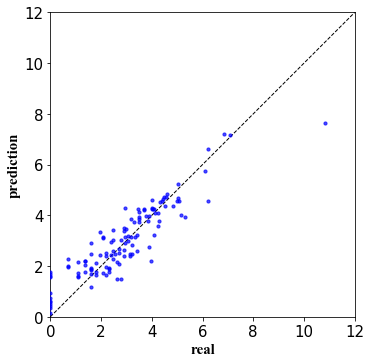

                             
train fold 3
预测误差较大城市:
白山市   real: 0.0   pre:1.7752793437650554
济宁市   real: 5.564520407322694   pre:3.909907469974152
塔城地区   real: 0.0   pre:1.5725794453969015
R-squared 0.9110450672919137
R 0.9544868083383414
mae 0.3980741588341637
rmse 0.5219997360758903


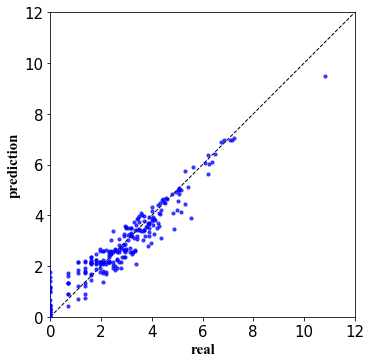

#########################################
test fold 3
预测误差较大城市:
齐齐哈尔市   real: 3.784189633918261   pre:1.9857474381765576
蚌埠市   real: 5.081404364984463   pre:2.8374215203433306
东营市   real: 0.0   pre:2.3204783149976977
云浮市   real: 0.0   pre:2.1662966840975426
崇左市   real: 0.0   pre:2.2963796485159205
武威市   real: 0.0   pre:1.6009116476114087
甘南藏族自治州   real: 2.1972245773362196   pre:0.4975718400146203
香港特别行政区   real: 6.5722825426940075   pre:1.9873023489226
R-squared 0.758652556383598
R 0.8710066339492473
mae 0.6269347947863296
rmse 0.8829195735458948


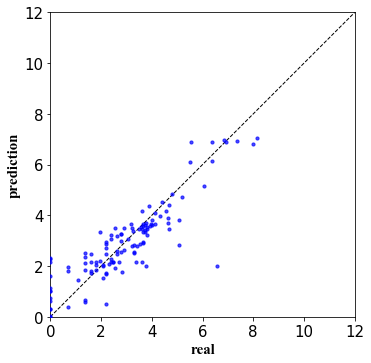

                             
************* cv evaluation ***************
R-squared 0.7613798572907118
R 0.8725708322484266
mae 0.6204849189123574
rmse 0.8457688244995394


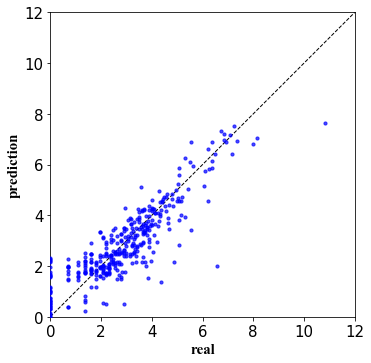

%%%%%%%%%%%%% all sample model %%%%%%%%%%%%%%
R-squared 0.8961619609346408
R 0.9466583126633605
mae 0.42095608577520544
rmse 0.565754523640805


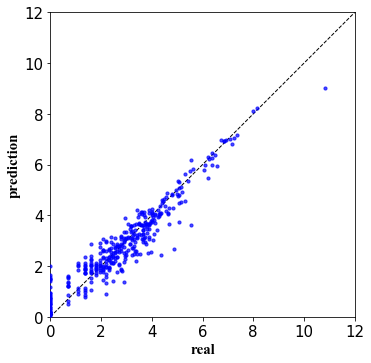

%%%%%% feature importances %%%%%%


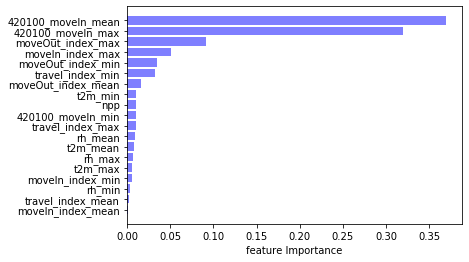

In [355]:
df2 = df[['id', 'location','rh_mean', 'rh_max', 'rh_min', 't2m_mean', 't2m_max', 't2m_min',
         'moveIn_index_mean', 'moveIn_index_max', 'moveIn_index_min',
         'moveOut_index_mean', 'moveOut_index_max', 'moveOut_index_min',
         'travel_index_mean', 'travel_index_max', 'travel_index_min',
         '420100_moveIn_mean', '420100_moveIn_max', '420100_moveIn_min', 'npp']]

confirmed = df['confirmed'].to_list()
confirmed = [math.log(i+1) for i in confirmed]
df2.loc[:, 'confirmed'] = confirmed

covid_all_predict(df2)

In [356]:
# 管控前疫情分析

In [362]:
df = pd.read_csv("../output/COVID_final.csv")

df2 = df[['id','location','npp',
         'rh_mean_before','rh_max_before','rh_min_before',
         't2m_mean_before','t2m_max_before','t2m_min_before',
         'moveIn_index_mean_before','moveIn_index_max_before',
         'moveIn_index_min_before','moveOut_index_mean_before',
         'moveOut_index_max_before','moveOut_index_min_before',
         'travel_index_mean_before','travel_index_max_before',
         'travel_index_min_before','420100_moveIn_mean_before',
         '420100_moveIn_max_before','420100_moveIn_min_before']]

confirmed = df['confirmed_before'].to_list()
confirmed = [math.log(i+1) for i in confirmed]
df2.loc[:, 'confirmed'] = confirmed
df2 = df2[~df2['id'].isin(['371200', '710000'])] # 去除台湾和莱芜
df2

/Users/shaoqi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/shaoqi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,id,location,npp,rh_mean_before,rh_max_before,rh_min_before,t2m_mean_before,t2m_max_before,t2m_min_before,moveIn_index_mean_before,...,moveOut_index_mean_before,moveOut_index_max_before,moveOut_index_min_before,travel_index_mean_before,travel_index_max_before,travel_index_min_before,420100_moveIn_mean_before,420100_moveIn_max_before,420100_moveIn_min_before,confirmed
0,110000,北京市,6.25382,46.565638,74.023287,34.093583,267.464901,271.101167,263.053292,8.566340,...,14.056416,23.914472,6.335561,5.289280,6.6375,1.8254,1.179615,2.21,0.36,4.234107
1,120000,天津市,7.12393,45.797824,79.905796,25.327988,270.778598,273.341750,267.294000,3.200709,...,5.085501,7.012818,2.520493,5.325788,6.3527,2.6262,0.188077,0.32,0.00,2.708050
2,130100,石家庄市,2.14262,56.479679,87.981583,34.477263,269.812381,273.535958,265.390500,2.590701,...,3.045354,4.087292,1.502712,5.225828,5.9427,2.5928,0.184615,0.29,0.06,2.079442
3,130200,唐山市,2.67739,45.062891,68.452333,27.550138,270.161917,273.097958,266.146583,1.510673,...,1.587544,2.205662,0.837605,5.456460,5.9061,4.0843,0.000000,0.00,0.00,0.000000
4,130300,秦皇岛市,1.50255,47.229598,70.363738,30.807417,269.211535,272.528792,264.316875,0.709180,...,0.764343,1.156615,0.427129,5.230188,5.7787,3.4338,0.000000,0.00,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,659002,阿拉尔市,0.66720,69.871555,81.086542,57.390038,267.069050,268.810375,264.994958,0.070737,...,0.097713,0.177455,0.057121,3.582960,4.2042,2.5136,0.000000,0.00,0.00,0.000000
359,659003,图木舒克市,1.20936,69.696107,81.028112,61.293054,269.485753,271.601000,267.745125,0.037384,...,0.045247,0.057251,0.023198,4.553112,4.9888,3.6551,0.000000,0.00,0.00,0.000000
360,659004,五家渠市,3.26684,99.810427,102.987604,95.853075,255.068213,261.279958,250.613167,0.163475,...,0.149565,0.184032,0.077533,3.046652,3.3415,2.4782,0.000000,0.00,0.00,0.000000
361,659005,北屯市,1.92770,91.235851,102.124792,76.697229,257.570272,261.578667,252.598417,0.070268,...,0.068137,0.086216,0.035737,4.448632,4.8466,3.2726,0.000000,0.00,0.00,0.000000


train fold 1
预测误差较大城市:
R-squared 0.8882702615737654
R 0.9424809078033175
mae 0.3023725061501543
rmse 0.3915605142291707


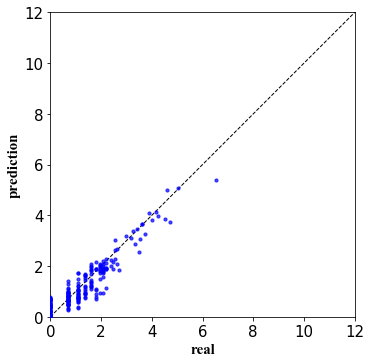

#########################################
test fold 1
预测误差较大城市:
潜江市   real: 1.791759469228055   pre:3.463943806010176
遵义市   real: 0.0   pre:1.7099602396173192
黔东南苗族侗族自治州   real: 0.0   pre:1.949985007128625
R-squared 0.6411321223414781
R 0.8007072638246003
mae 0.49596969110811384
rmse 0.6207860736718109


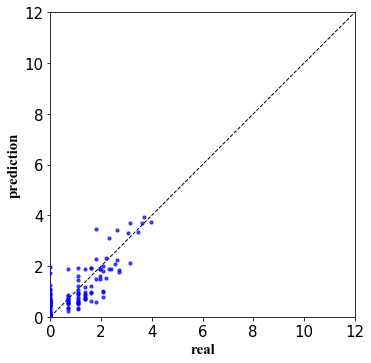

                             
train fold 2
预测误差较大城市:
武汉市   real: 6.54965074223381   pre:4.779684345328353
R-squared 0.8586699964358568
R 0.9266444822238229
mae 0.32671439154622967
rmse 0.4097359421373447


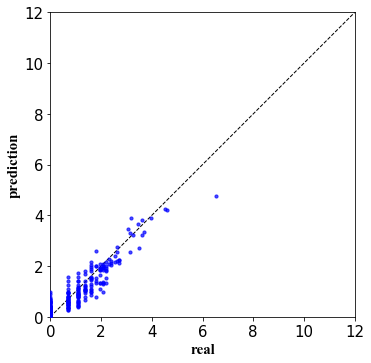

#########################################
test fold 2
预测误差较大城市:
铜川市   real: 1.791759469228055   pre:0.2875594332726339
R-squared 0.7401070401110662
R 0.8602947402553768
mae 0.5022900535065172
rmse 0.6132171980307847


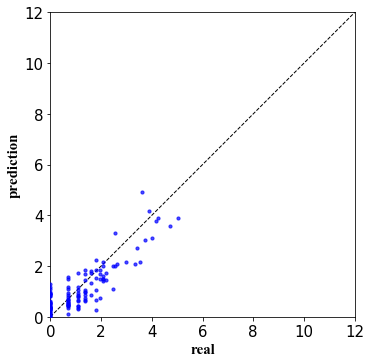

                             
train fold 3
预测误差较大城市:
R-squared 0.8781636215408702
R 0.9371038477889578
mae 0.3072187119102425
rmse 0.39115469601341374


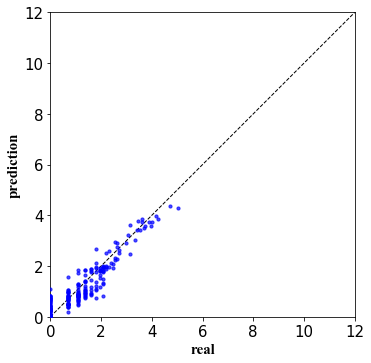

#########################################
test fold 3
预测误差较大城市:
德州市   real: 1.9459101490553132   pre:0.32963631092721846
武汉市   real: 6.54965074223381   pre:4.094916702214123
东莞市   real: 1.0986122886681098   pre:2.73200662689095
万宁市   real: 2.0794415416798357   pre:0.46437646266172267
R-squared 0.6563125795687935
R 0.8101312113286301
mae 0.49680449117470005
rmse 0.65398880064343


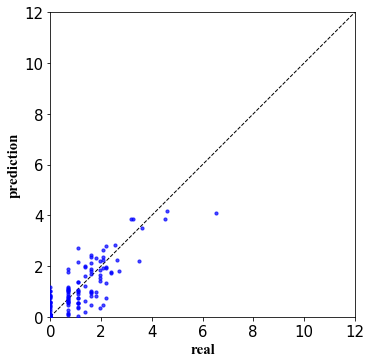

                             
************* cv evaluation ***************
R-squared 0.6793303963696852
R 0.8242150182869062
mae 0.49835902773296786
rmse 0.629511023500083


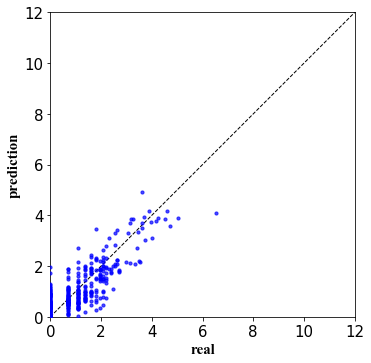

%%%%%%%%%%%%% all sample model %%%%%%%%%%%%%%
R-squared 0.8573490450907667
R 0.9259314472955148
mae 0.3366257606608744
rmse 0.4284180042943427


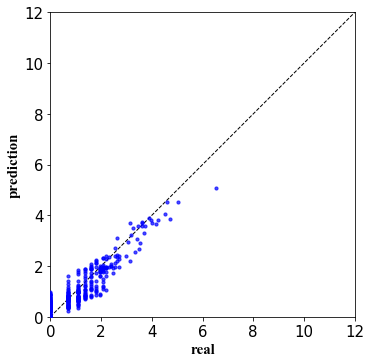

%%%%%% feature importances %%%%%%


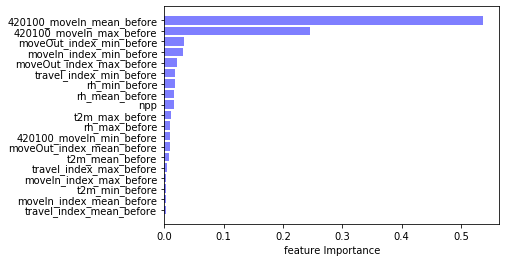

In [363]:
covid_all_predict(df2)

In [364]:
# 管控后疫情建模

In [366]:
df = pd.read_csv("../output/COVID_final.csv")

df2 = df[['id','location','npp',
         'rh_mean_after','rh_max_after','rh_min_after',
         't2m_mean_after','t2m_max_after','t2m_min_after',
         'moveIn_index_mean_after','moveIn_index_max_after',
         'moveIn_index_min_after','moveOut_index_mean_after',
         'moveOut_index_max_after','moveOut_index_min_after',
         'travel_index_mean_after','travel_index_max_after',
         'travel_index_min_after','420100_moveIn_mean_after',
         '420100_moveIn_max_after','420100_moveIn_min_after']]


confirmed = df['confirmed_after'].to_list()
confirmed = [math.log(i+1) for i in confirmed]
df2.loc[:, 'confirmed'] = confirmed
df2 = df2[~df2['id'].isin(['371200', '710000'])] # 去除台湾和莱芜

df2

/Users/shaoqi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/shaoqi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,id,location,npp,rh_mean_after,rh_max_after,rh_min_after,t2m_mean_after,t2m_max_after,t2m_min_after,moveIn_index_mean_after,...,moveOut_index_mean_after,moveOut_index_max_after,moveOut_index_min_after,travel_index_mean_after,travel_index_max_after,travel_index_min_after,420100_moveIn_mean_after,420100_moveIn_max_after,420100_moveIn_min_after,confirmed
0,110000,北京市,6.25382,46.468169,86.722396,17.081542,274.994719,284.989625,263.591917,2.905330,...,1.455727,5.303232,0.807311,2.520323,4.2272,1.3431,0.176,0.27,0.07,6.240276
1,120000,天津市,7.12393,46.642699,90.386729,10.992484,277.967881,288.570042,268.480167,1.487642,...,0.988932,2.005495,0.359802,3.023556,5.2505,1.4763,0.052,0.08,0.00,5.081404
2,130100,石家庄市,2.14262,50.901870,87.733075,19.951804,277.860148,288.740958,268.302292,1.033726,...,0.941177,1.774062,0.394826,3.126094,5.1806,1.7145,0.036,0.07,0.00,3.135494
3,130200,唐山市,2.67739,47.641678,93.551529,12.276571,276.620780,286.564375,265.588208,0.615503,...,0.580689,1.132153,0.200718,3.514908,5.3882,1.8941,0.010,0.03,0.00,0.000000
4,130300,秦皇岛市,1.50255,48.774308,89.614417,15.154958,275.195895,284.933333,262.464167,0.252586,...,0.258653,0.537484,0.081842,3.391455,5.0298,1.8130,0.000,0.00,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,659002,阿拉尔市,0.66720,39.473057,62.441879,19.870617,277.074868,288.034917,267.488333,0.028769,...,0.028908,0.081486,0.003110,2.134245,4.0822,0.5867,0.000,0.00,0.00,0.000000
359,659003,图木舒克市,1.20936,34.271311,62.464175,14.149744,279.226994,289.047417,270.137833,0.013298,...,0.014960,0.042217,0.001912,2.733564,4.9976,0.9690,0.000,0.00,0.00,0.000000
360,659004,五家渠市,3.26684,70.094339,101.004383,14.990040,269.775360,287.872083,253.920167,0.061538,...,0.059187,0.164009,0.015941,1.529576,3.1744,0.5857,0.000,0.00,0.00,0.000000
361,659005,北屯市,1.92770,71.213596,99.257154,30.104621,266.794566,280.935292,249.574333,0.029373,...,0.029247,0.138024,0.006383,2.183032,4.8881,0.4165,0.000,0.00,0.00,0.000000


train fold 1
预测误差较大城市:
鞍山市   real: 0.0   pre:1.8686320409703985
齐齐哈尔市   real: 3.7612001156935624   pre:2.150681072534476
蚌埠市   real: 5.062595033026967   pre:2.5354828377258176
亳州市   real: 4.634728988229636   pre:2.906430449655486
萍乡市   real: 3.4657359027997265   pre:0.9716142236505239
威海市   real: 3.4657359027997265   pre:1.7249344691227164
茂名市   real: 0.0   pre:1.6676673227275942
河源市   real: 0.0   pre:1.5007215964847394
甘孜藏族自治州   real: 4.343805421853684   pre:2.613481558593146
拉萨市   real: 0.0   pre:1.6165340269410855
榆林市   real: 0.0   pre:1.682844962854927
R-squared 0.8834422522324252
R 0.9399160878676486
mae 0.5428196171274602
rmse 0.7288710132860523


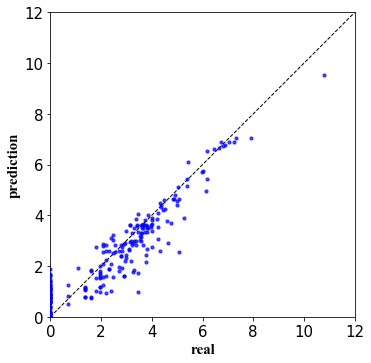

#########################################
test fold 1
预测误差较大城市:
北京市   real: 6.240275845170769   pre:4.475312703444243
唐山市   real: 0.0   pre:2.933597671371701
包头市   real: 2.302585092994046   pre:0.719349558335241
丹东市   real: 2.3978952727983707   pre:0.8338715195173613
双鸭山市   real: 3.9512437185814275   pre:0.11178263837913323
大庆市   real: 3.091042453358316   pre:1.4361725380462658
七台河市   real: 2.833213344056216   pre:0.01097733880735129
新余市   real: 4.852030263919617   pre:0.7885789152743683
济宁市   real: 5.545177444479562   pre:3.5572899559094906
焦作市   real: 0.0   pre:3.1475239024723374
神农架林区   real: 0.0   pre:4.57787654147614
中山市   real: 4.174387269895637   pre:2.5347469834960474
潮州市   real: 0.0   pre:3.279817889741927
防城港市   real: 2.833213344056216   pre:0.9632761362505716
临高县   real: 1.791759469228055   pre:0.2427514244751549
巴中市   real: 0.0   pre:2.623337841553494
毕节市   real: 0.0   pre:2.0786649017833208
玉溪市   real: 2.6390573296152584   pre:1.0381123277412636
天水市   real: 0.0   pre:2.108

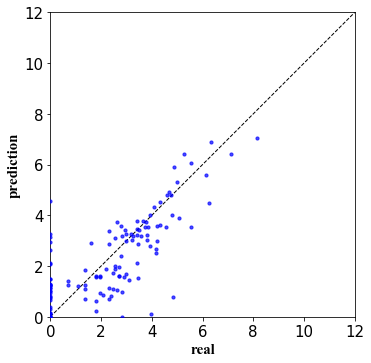

                             
train fold 2
预测误差较大城市:
鞍山市   real: 0.0   pre:1.5115720700283446
通化市   real: 0.0   pre:1.5591659963793376
双鸭山市   real: 3.9512437185814275   pre:2.0701665122190303
亳州市   real: 4.634728988229636   pre:2.9576788704567667
新余市   real: 4.852030263919617   pre:2.153286370541366
焦作市   real: 0.0   pre:2.273818110816222
神农架林区   real: 0.0   pre:3.615963597626421
茂名市   real: 0.0   pre:1.912816711666712
潮州市   real: 0.0   pre:2.10483599346103
贵港市   real: 0.0   pre:1.7761226118080233
巴中市   real: 0.0   pre:1.6197717692606404
甘孜藏族自治州   real: 4.343805421853684   pre:1.9778852144683658
昌吉回族自治州   real: 0.0   pre:1.6314564884632126
香港特别行政区   real: 0.0   pre:1.6033857085211118
R-squared 0.8524601576917582
R 0.9232876895593043
mae 0.5640288376119901
rmse 0.7770956794018195


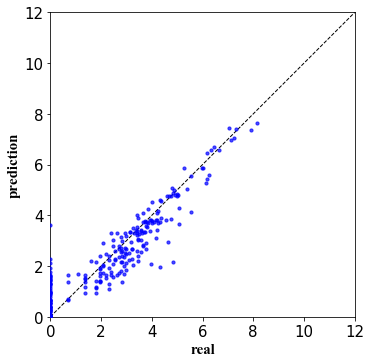

#########################################
test fold 2
预测误差较大城市:
鄂尔多斯市   real: 2.302585092994046   pre:0.48286507409355794
兴安盟   real: 0.0   pre:1.5991101399460241
葫芦岛市   real: 2.3978952727983707   pre:0.6816285405834719
延边朝鲜族自治州   real: 0.0   pre:1.6987645553346735
哈尔滨市   real: 5.25227342804663   pre:3.083195409277842
黑河市   real: 0.0   pre:2.185968176709799
淮北市   real: 3.295836866004329   pre:1.414740390197363
铜陵市   real: 3.295836866004329   pre:1.5445685242288607
莆田市   real: 4.02535169073515   pre:2.1245281034634305
宁德市   real: 3.1780538303479458   pre:1.6614324501280797
鹰潭市   real: 0.0   pre:1.8842297250833073
濮阳市   real: 0.0   pre:2.4464973831355694
武汉市   real: 10.805861899150436   pre:6.576305381888678
恩施土家族苗族自治州   real: 5.429345628954441   pre:7.107457827034248
娄底市   real: 4.248495242049359   pre:2.299815553382731
江门市   real: 0.0   pre:3.1301417064744603
河源市   real: 0.0   pre:2.168483781611175
钦州市   real: 0.0   pre:1.7478143946884974
贺州市   real: 0.0   pre:1.854325862701326
崇左市   r

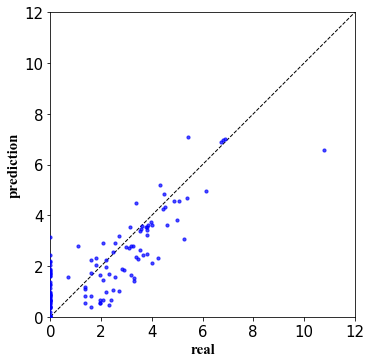

                             
train fold 3
预测误差较大城市:
张家口市   real: 0.0   pre:1.5846100558993417
锡林郭勒盟   real: 2.0794415416798357   pre:0.5190174800937555
双鸭山市   real: 3.9512437185814275   pre:2.028148883781684
新余市   real: 4.852030263919617   pre:1.826046235694402
济宁市   real: 5.545177444479562   pre:3.705435674463627
焦作市   real: 0.0   pre:1.7117993800591755
濮阳市   real: 0.0   pre:1.8525412514159378
武汉市   real: 10.805861899150436   pre:8.957191607787957
神农架林区   real: 0.0   pre:2.5168198484891566
娄底市   real: 4.248495242049359   pre:2.490700980553849
河源市   real: 0.0   pre:1.569245980284376
西双版纳傣族自治州   real: 2.70805020110221   pre:1.1501650352852573
R-squared 0.8688181947074507
R 0.932104175887787
mae 0.5544151189430899
rmse 0.74097118328591


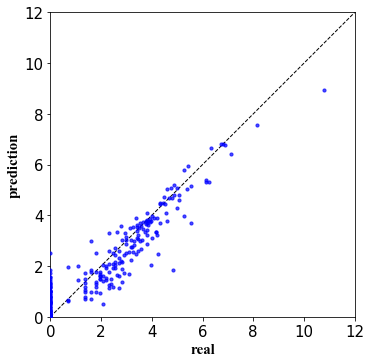

#########################################
test fold 3
预测误差较大城市:
呼和浩特市   real: 0.0   pre:2.9945795646242
鞍山市   real: 0.0   pre:2.388314163042907
锦州市   real: 0.0   pre:1.8429380784054168
齐齐哈尔市   real: 3.7612001156935624   pre:1.9847987944609056
温州市   real: 6.159095388491933   pre:4.300690957921213
蚌埠市   real: 5.062595033026967   pre:2.5988413246329367
亳州市   real: 4.634728988229636   pre:2.0891114022239927
萍乡市   real: 3.4657359027997265   pre:1.690974173415843
威海市   real: 3.4657359027997265   pre:1.9500297247955583
聊城市   real: 3.6375861597263857   pre:2.0367428968756385
茂名市   real: 0.0   pre:3.4510100106366735
河池市   real: 3.258096538021482   pre:1.0486201142145073
甘孜藏族自治州   real: 4.343805421853684   pre:0.017998061749886083
遵义市   real: 0.0   pre:2.127936925220808
宝鸡市   real: 0.0   pre:2.249154510402769
榆林市   real: 0.0   pre:1.6001440157066604
昌吉回族自治州   real: 0.0   pre:1.9978390353584128
伊犁哈萨克自治州   real: 2.8903717578961645   pre:0.4271649444648884
R-squared 0.704501763632026
R 0.8393460333

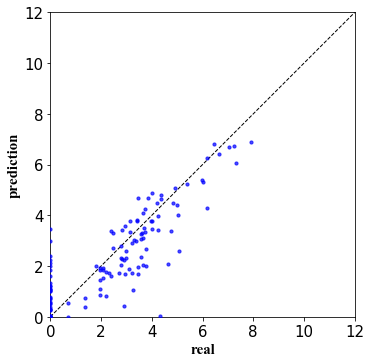

                             
************* cv evaluation ***************
R-squared 0.6572617960064401
R 0.8107168408306565
mae 0.892764108459478
rmse 1.187503866804793


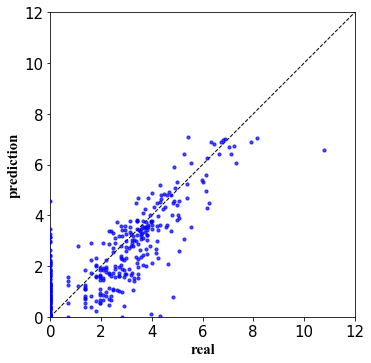

%%%%%%%%%%%%% all sample model %%%%%%%%%%%%%%
R-squared 0.8360463122662853
R 0.9143556814863051
mae 0.6307511097009826
rmse 0.8299922071195319


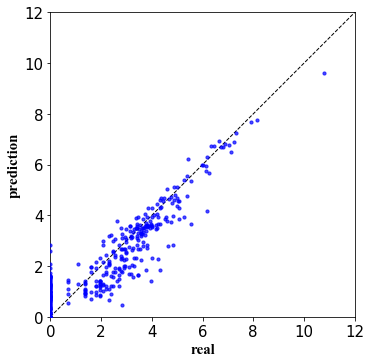

%%%%%% feature importances %%%%%%


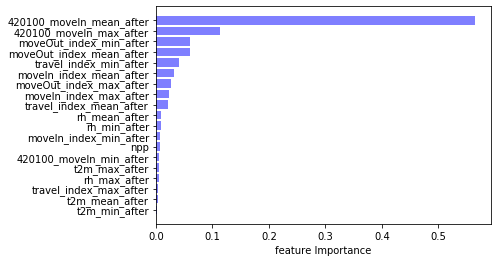

In [367]:
covid_all_predict(df2)